In [8]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [9]:
import os
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from google.colab import userdata
from matplotlib import pyplot as plt
# File Name Utils
file_dir = userdata.get("FILE_DIR")
file_name = "crop_yield_dataset.csv"
file_path = os.path.join(file_dir, file_name)

# Read File Data
df = pd.read_csv(file_path)
df.head()

,weather_condition,crop_type,irrigation_used,days_to_harvest,rainfall_mm,temperature_celsius,crop_yield_success,fertilizer_used,region,soil_type,crop_yield
0,0,0,0,122,897.077239,27.676966,1,0,0,0,6.555816
1,1,1,0,140,992.673282,18.026142,1,1,1,1,8.527341
2,2,2,1,106,147.998025,29.794042,1,0,2,2,1.127443
3,1,3,0,146,986.866331,16.644190,1,0,2,0,6.517573
4,0,4,0,110,730.379174,31.620687,1,1,1,3,7.248251


In [10]:
# Data Overview
print("Dimension: ", df.shape)

# Missing and Duplicates
print("\nNumber of missing values")
print("-"*30)
print(df.isna().sum())

print("\nNumber of duplicated values")
print("-"*30)
print(df.duplicated().sum())

Dimension:  (1000000, 11)

Number of missing values
------------------------------
weather_condition      0
crop_type              0
irrigation_used        0
days_to_harvest        0
rainfall_mm            0
temperature_celsius    0
crop_yield_success     0
fertilizer_used        0
region                 0
soil_type              0
crop_yield             0
dtype: int64

Number of duplicated values
------------------------------
0


#### Crop Yield: Numerical Analysis

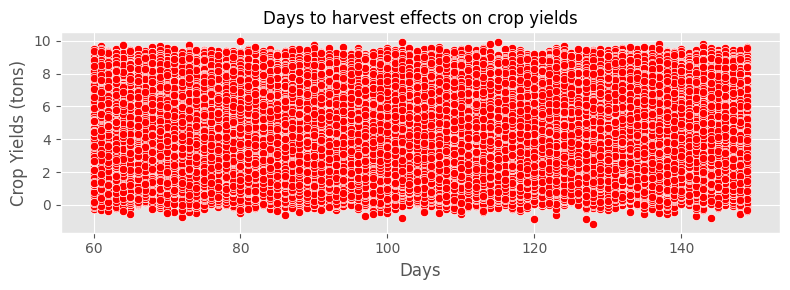

In [11]:
fig, axes = plt.subplots(1, 1, figsize=(8, 3))
plt.style.use("ggplot")

sns.scatterplot(x=df["days_to_harvest"], y=df["crop_yield"], color="red", ax=axes)
plt.title("Days to harvest effects on crop yields", fontdict={"fontsize": 12, "fontweight": "light"})
plt.xlabel("Days")
plt.ylabel("Crop Yields (tons)")

plt.tight_layout()
plt.show()

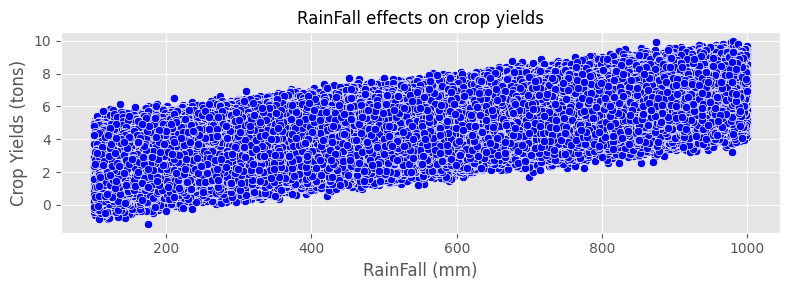

In [12]:
fig, axes = plt.subplots(1, 1, figsize=(8, 3))
plt.style.use("ggplot")

sns.scatterplot(x=df["rainfall_mm"], y=df["crop_yield"], color="blue", ax=axes)
plt.xlabel("RainFall (mm)")
plt.ylabel("Crop Yields (tons)")
plt.title("RainFall effects on crop yields", fontdict={"fontsize": 12, "fontweight": "light"})

plt.tight_layout()
plt.show()

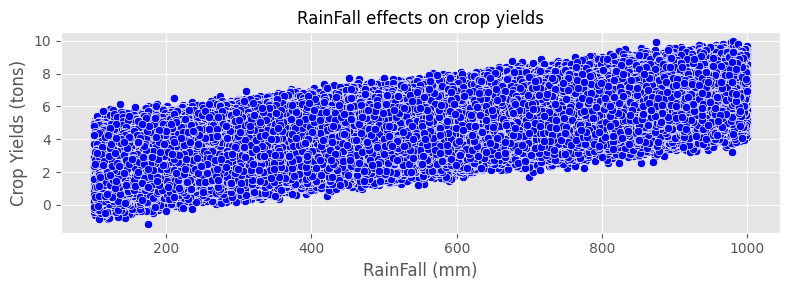

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 1, figsize=(8, 3))
plt.style.use("ggplot")
sns.scatterplot(x=df["rainfall_mm"], y=df["crop_yield"], color="blue", ax=axes)

plt.xlabel("RainFall (mm)")
plt.ylabel("Crop Yields (tons)")
plt.title("RainFall effects on crop yields", fontdict={"fontsize": 12, "fontweight": "light"})
plt.tight_layout()
plt.show()

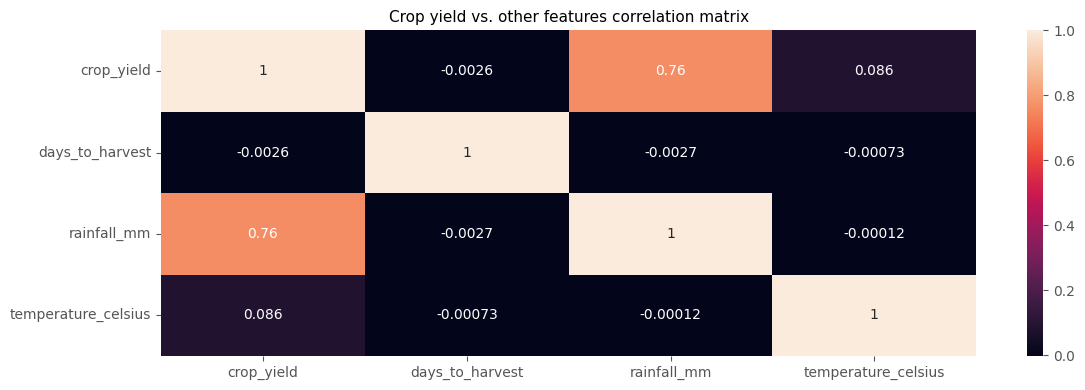

In [14]:
# List of all features for regression analysis
check_columns_corr = ["crop_yield", "days_to_harvest", "rainfall_mm", "temperature_celsius"]
corr = df[check_columns_corr].corr()

## Correlation Analysis
plt.subplots(1,1, figsize=(12, 4))
plt.style.use("ggplot")

sns.heatmap(corr, annot=True)
plt.title("Crop yield vs. other features correlation matrix", fontsize=11)

plt.tight_layout()
plt.show()

#### Crop Yield: Categorical Analysis

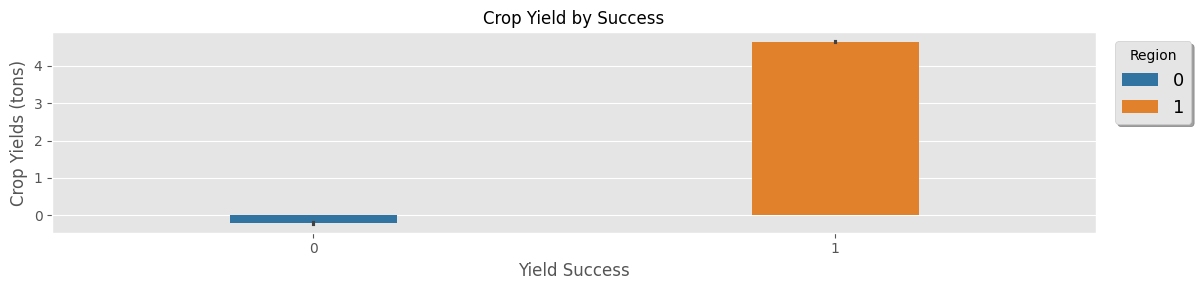

In [15]:
fig, axes = plt.subplots(1, 1, figsize=(12, 3))
plt.style.use("ggplot")
sns.barplot(df, x="crop_yield_success", y="crop_yield", gap=0.6, ax=axes, palette="tab10", hue="crop_yield_success")
plt.xlabel("Yield Success")
plt.ylabel("Crop Yields (tons)")
plt.title("Crop Yield by Success", fontdict={"fontsize": 12, "fontweight": "light"})
plt.legend(title="Region", loc=1, bbox_to_anchor=(0.6, 0.5, 0.5, 0.5), shadow=True, fontsize=13)

plt.tight_layout()
plt.show()

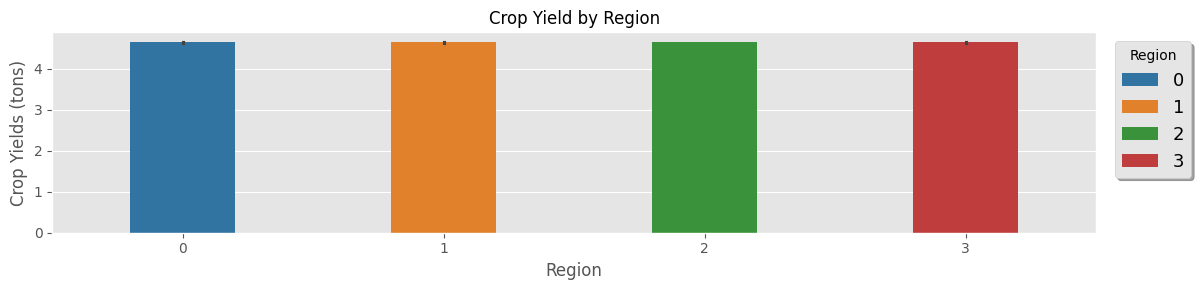

In [16]:
fig, axes = plt.subplots(1, 1, figsize=(12, 3))
plt.style.use("ggplot")
sns.barplot(df, x="region", y="crop_yield", ax=axes, gap=0.5, palette="tab10", hue="region")

plt.xlabel("Region")
plt.ylabel("Crop Yields (tons)")
plt.title("Crop Yield by Region", fontdict={"fontsize": 12, "fontweight": "light"})
plt.legend(title="Region", loc=1, bbox_to_anchor=(0.6, 0.5, 0.5, 0.5), shadow=True, fontsize=13)
plt.tight_layout()
plt.show()

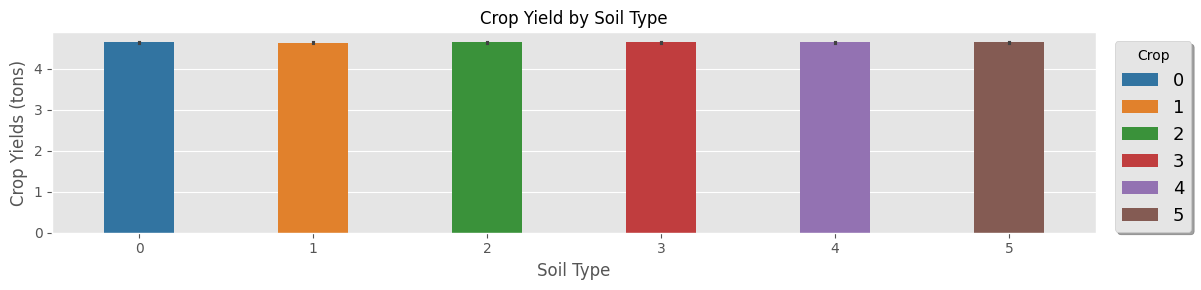

In [17]:
fig, axes = plt.subplots(1, 1, figsize=(12, 3))
plt.style.use("ggplot")
sns.barplot(df, x="soil_type", y="crop_yield", ax=axes, gap=0.5, palette="tab10", hue="soil_type")

plt.legend(title="Crop", loc=1, bbox_to_anchor=(0.6, 0.5, 0.5, 0.5), shadow=True, fontsize=13)
plt.xlabel("Soil Type")
plt.ylabel("Crop Yields (tons)")
plt.title("Crop Yield by Soil Type", fontdict={"fontsize": 12, "fontweight": "light"})
plt.tight_layout()
plt.show()

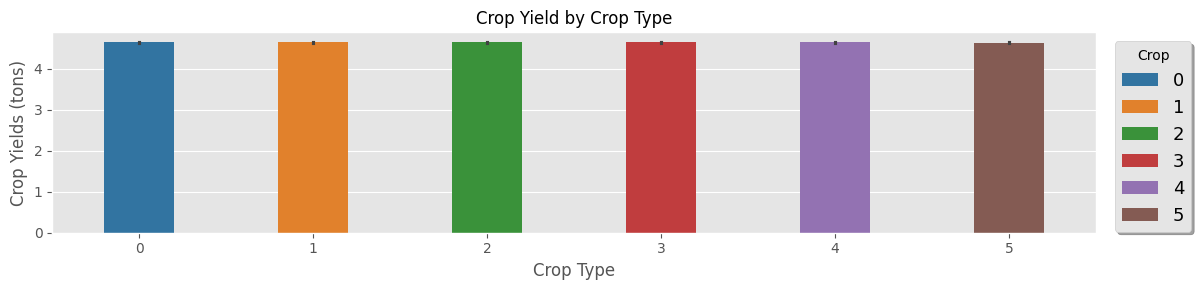

In [18]:
fig, axes = plt.subplots(1, 1, figsize=(12, 3))
plt.style.use("ggplot")
sns.barplot(df, x="crop_type", y="crop_yield", ax=axes, gap=0.5, palette="tab10", hue="crop_type")

plt.legend(title="Crop", loc=1, bbox_to_anchor=(0.6, 0.5, 0.5, 0.5), shadow=True, fontsize=13)
plt.xlabel("Crop Type")
plt.ylabel("Crop Yields (tons)")
plt.title("Crop Yield by Crop Type", fontdict={"fontsize": 12, "fontweight": "light"})
plt.tight_layout()
plt.show()

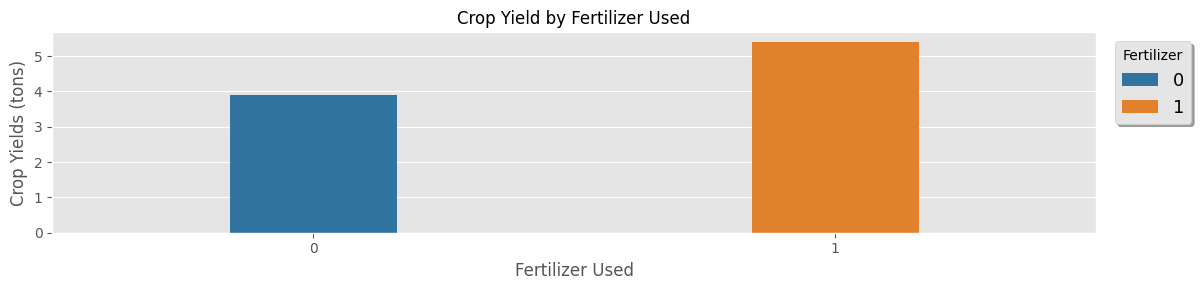

In [19]:
fig, axes = plt.subplots(1, 1, figsize=(12, 3))
plt.style.use("ggplot")
sns.barplot(df, x="fertilizer_used", y="crop_yield", ax=axes, gap=0.6, palette="tab10", hue="fertilizer_used")

plt.legend(title="Fertilizer", loc=1, bbox_to_anchor=(0.6, 0.5, 0.5, 0.5), shadow=True, fontsize=13)
plt.xlabel("Fertilizer Used")
plt.ylabel("Crop Yields (tons)")
plt.title("Crop Yield by Fertilizer Used", fontdict={"fontsize": 12, "fontweight": "light"})
plt.tight_layout()
plt.show()

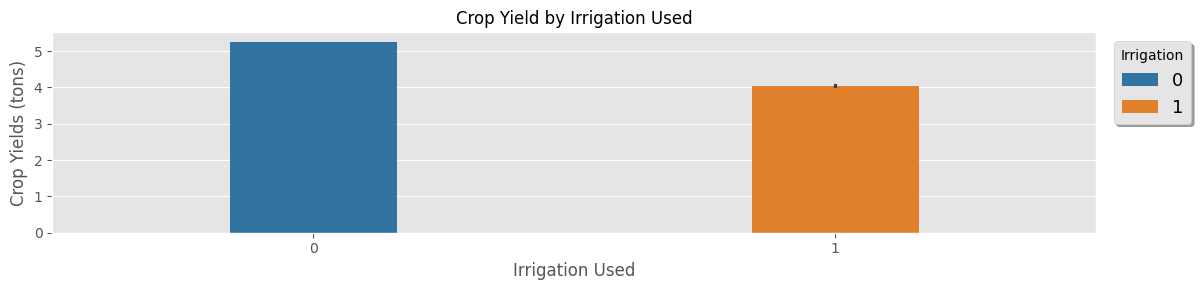

In [20]:
fig, axes = plt.subplots(1, 1, figsize=(12, 3))
plt.style.use("ggplot")
sns.barplot(df, x="irrigation_used", y="crop_yield",gap=0.6, ax=axes, palette="tab10", hue="irrigation_used")

plt.legend(title="Irrigation", loc=1, bbox_to_anchor=(0.6, 0.5, 0.5, 0.5), shadow=True, fontsize=13)
plt.xlabel("Irrigation Used")
plt.ylabel("Crop Yields (tons)")
plt.title("Crop Yield by Irrigation Used", fontdict={"fontsize": 12, "fontweight": "light"})
plt.tight_layout()
plt.show()

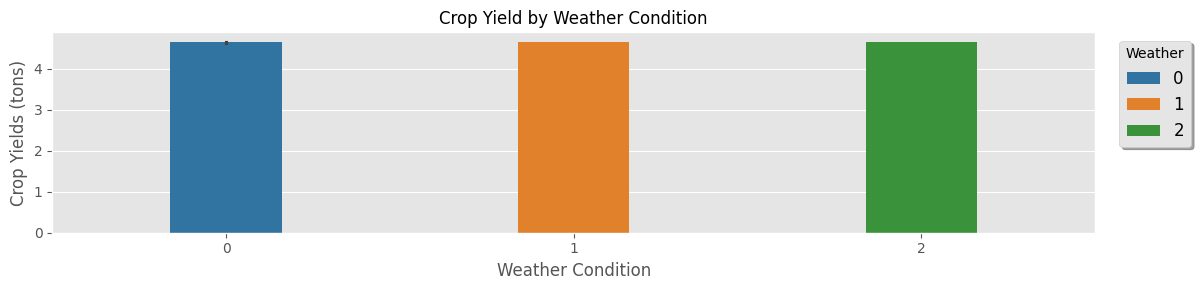

In [21]:
fig, axes = plt.subplots(1, 1, figsize=(12, 3))
plt.style.use("ggplot")
sns.barplot(df, x="weather_condition", y="crop_yield", gap=0.6, ax=axes, palette="tab10", hue="weather_condition")
plt.legend(title="Weather", loc=1, bbox_to_anchor=(0.6, 0.5, 0.5, 0.5), shadow=True, fontsize=12)
plt.xlabel("Weather Condition")
plt.ylabel("Crop Yields (tons)")
plt.title("Crop Yield by Weather Condition", fontdict={"fontsize": 12, "fontweight": "light"})
plt.tight_layout()
plt.show()

#### Model Development

In [22]:
from sklearn.model_selection import train_test_split

feature_data_pd = df.copy()
print(f"We have {feature_data_pd.shape[0]} records in our source dataset")

# split target variable into it's own dataset
target_col = "crop_yield"
X_all = feature_data_pd.drop(labels=target_col, axis=1)
y_all = feature_data_pd[target_col]

# test / train split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, train_size=0.8, random_state=42)
print(f"We have {X_train.shape[0]} records in our training dataset")
print(f"We have {X_test.shape[0]} records in our test dataset")

We have 1000000 records in our source dataset
We have 800000 records in our training dataset
We have 200000 records in our test dataset


In [23]:
from math import sqrt
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

# Apply the Standard Scaler to all our numerical features
columns_scaler = ["rainfall_mm", "temperature_celsius", "days_to_harvest"]
columns_encoder = list(set(X_train.columns) - set(columns_scaler))

std_ct = make_column_transformer(
    (StandardScaler(), columns_scaler), remainder="passthrough"
)

In [24]:
# pipeline to transform inputs and then pass results to the linear regression model
lr_pl = Pipeline(steps=[
  ("tx_inputs", std_ct),
  ("lr", LinearRegression() )
])

# fit our model
lr_mdl = lr_pl.fit(X_train, y_train)

In [25]:
# evaluate the test set
predicted = lr_mdl.predict(X_test)
test_r2 = r2_score(y_test, predicted)
test_mse = mean_squared_error(y_test, predicted)
test_rmse = sqrt(test_mse)
test_mape = mean_absolute_percentage_error(y_test, predicted)

print("Test evaluation summary:")
print(f"R^2: {test_r2}")
print(f"MSE: {test_mse}")
print(f"RMSE: {test_rmse}")
print(f"MAPE: {test_mape}")

Test evaluation summary:
R^2: 0.9131697029900037
MSE: 0.25032712469652163
RMSE: 0.5003270177559089
MAPE: 0.1208340860285384


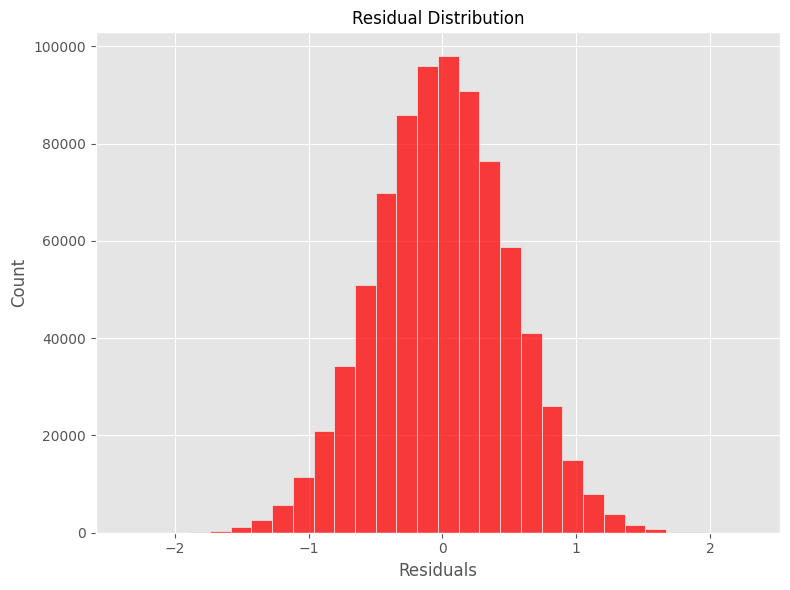

In [26]:
# Calculating model errors (residuals)
resid = pd.DataFrame(np.transpose([y_train - lr_mdl.predict(X_train)]), columns=["Training Error"])

# Plot model errors
plt.subplots(1,1, figsize=(8, 6))
plt.style.use("ggplot")

sns.histplot(data=resid, x="Training Error", color="red", bins=30)

plt.xlabel("Residuals")
plt.ylabel("Count")
plt.title("Residual Distribution", fontdict={"fontsize": 12, "fontweight": "light"})
plt.tight_layout()
plt.show()

In [27]:
from scipy import stats

# Extracting coefficients and intercept
coefficients = np.append([lr_mdl.named_steps['lr'].intercept_], lr_mdl.named_steps['lr'].coef_)
coefficient_names = ['Intercept'] + X_train.columns.to_list()

# Calculating standard errors and other statistics
n_rows, n_cols = X_train.shape
X_with_intercept = np.append(np.ones((n_rows, 1)), X_train, axis=1)
var_b = test_mse * np.linalg.inv(np.dot(X_with_intercept.T, X_with_intercept)).diagonal()
standard_errors = np.sqrt(var_b)
t_values = coefficients / standard_errors
p_values = [2 * (1 - stats.t.cdf(np.abs(i), (len(X_with_intercept) - 1))) for i in t_values]

# Creating a DataFrame for display
summary_df = pd.DataFrame({'Coefficient': coefficients,
                           'Standard Error': standard_errors,
                           't-value': t_values,
                           'p-value': p_values},
                          index=coefficient_names)

# Print the DataFrame
print(summary_df)

                     Coefficient  Standard Error       t-value   p-value
Intercept               3.173829        0.037452     84.744783  0.000000
weather_condition       1.297638        0.000685   1893.819808  0.000000
crop_type               0.143732        0.000327    438.947297  0.000000
irrigation_used         0.000518        0.001119      0.463224  0.643204
days_to_harvest        -0.000093        0.000022     -4.318792  0.000016
rainfall_mm            -0.000597        0.000002   -276.982289  0.000000
temperature_celsius    -1.198624        0.000077 -15469.568541  0.000000
crop_yield_success      1.328368        0.037317     35.596410  0.000000
fertilizer_used         1.498800        0.001119   1339.527954  0.000000
region                  0.000324        0.000500      0.647370  0.517393
soil_type              -0.000698        0.000327     -2.132797  0.032942


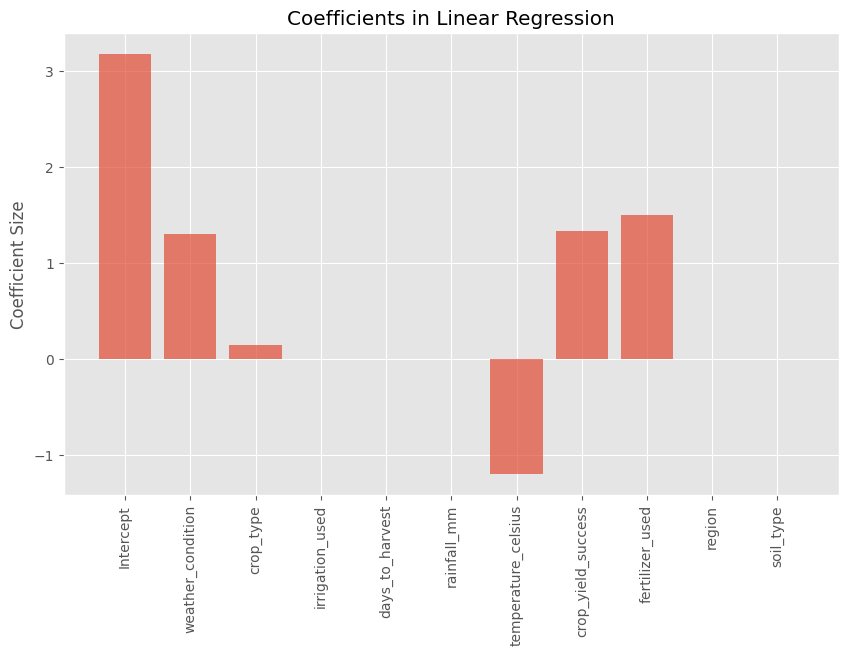

In [28]:
# Plotting the feature importances
plt.figure(figsize=(10, 6))
y_pos = np.arange(len(coefficient_names))
plt.bar(y_pos, coefficients, align='center', alpha=0.7)
plt.xticks(y_pos, coefficient_names, rotation=90)
plt.ylabel('Coefficient Size')
plt.title('Coefficients in Linear Regression')

plt.show()

**Note:** Try to go learn about interpreting the model information provided above.